# Step Into My Formula 1 Analysis Arena! 🏁📊✨

**Welcome to Charaf's F1 Power Notebook! 🏁📊✨📈✨**

Dive into my personal breakdown of Formula 1, where I uncover the stats, trends, and insights from the world's fastest motorsport. Feel free to explore and share any suggestions to help me refine this project!

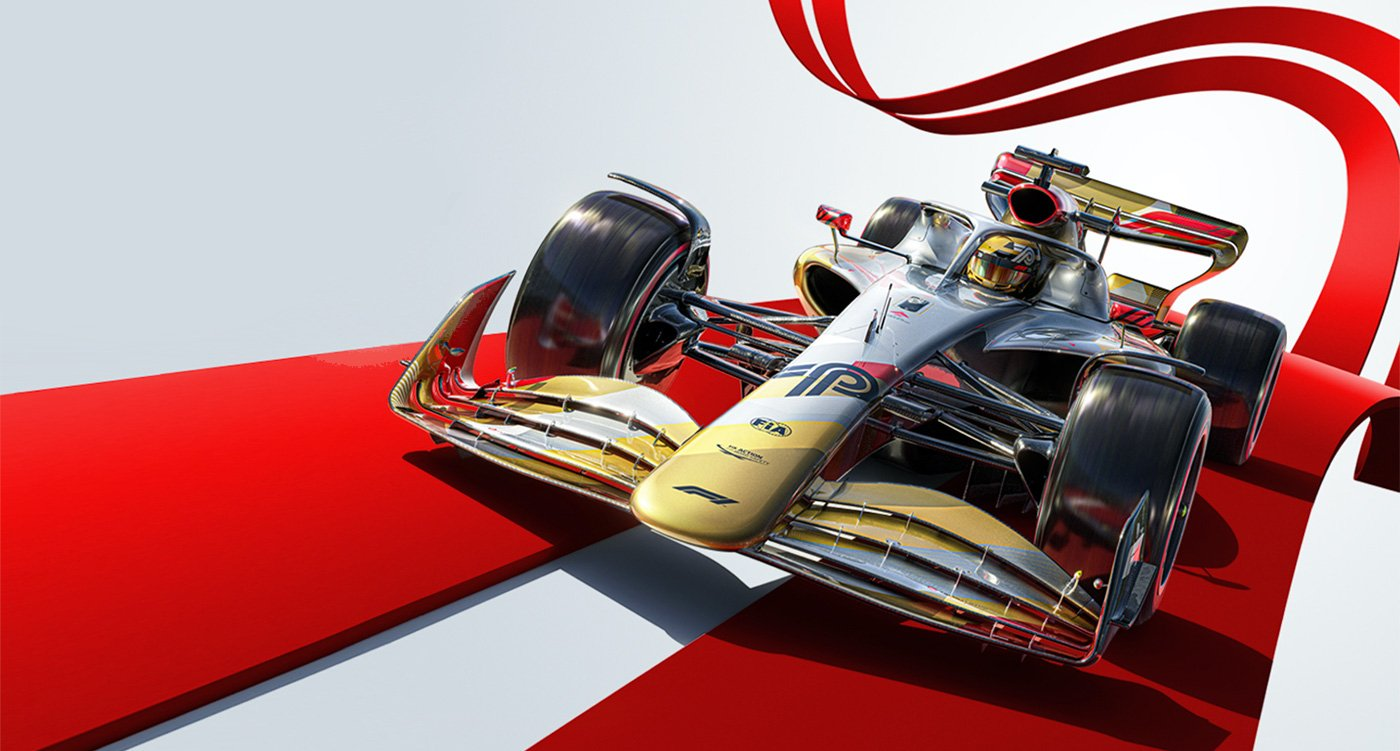

# Introduction

In this project, I analyze Formula 1 (F1 or Formula One), the highest class of single-seater auto racing, regulated by the Fédération Internationale de l'Automobile (FIA) and owned by the Formula One Group. Since its inaugural season in 1950, the FIA Formula One World Championship has captivated audiences worldwide. The term "formula" refers to the strict regulations that all teams and cars must follow. My analysis covers the Grands Prix, which take place on specially designed circuits and public roads globally.

# Importing Libraries & Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import datetime 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
circuits = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/circuits.csv')
laptimes = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/lap_times.csv')
pitstops = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/pit_stops.csv')
seasons = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/seasons.csv',parse_dates=['year'])
status = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/status.csv')

In [3]:
constructor_standings = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/constructor_standings.csv')
constructors = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/constructors.csv')
driver_standings = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/driver_standings.csv')
drivers = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/drivers.csv')

In [4]:
races = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/races.csv',parse_dates=['year'])
constructor_results = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/constructor_results.csv')
results = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/results.csv')
qualifying = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/qualifying.csv')

# Formula 1 World Championship Analysis🏎️ - EDA

## Merging

In [5]:
team = constructors.merge(results,on='constructorId',how = 'left')

## Extracting the columns

In [6]:
best = team[['name','points','raceId']]
best = best.groupby('name')['raceId'].nunique().sort_values(ascending=False).reset_index(name = 'races')
best = best[best['races'] >= 100]
best.head(5) 

,name,races
0,Ferrari,1043
1,McLaren,872
2,Williams,786
3,Tyrrell,433
4,Renault,403


In [7]:
func = lambda x: x.points.sum()/x.raceId.nunique()
data = team[team['name'].isin(best.name)].groupby('name').apply(func).sort_values(ascending=False).reset_index(name = 'points_per_race')
data.head(10)

C:\Users\Charaf\AppData\Local\Temp\ipykernel_16372\3026266343.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = team[team['name'].isin(best.name)].groupby('name').apply(func).sort_values(ascending=False).reset_index(name = 'points_per_race')


,name,points_per_race
0,Mercedes,25.611538
1,Red Bull,17.667656
2,Ferrari,9.479386
3,McLaren,6.961009
4,Force India,5.179245
5,Williams,4.569975
6,Renault,4.409429
7,Benetton,3.311538
8,BRM,2.581731
9,Team Lotus,2.518987


# Visualization

## Average Constructor's Points per Race

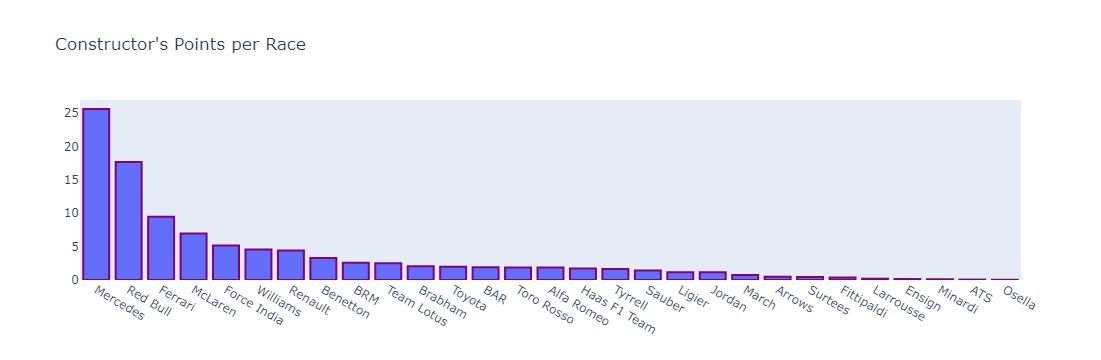

In [31]:
fig = go.Figure(
    data=[go.Bar(x = data.name, y=data['points_per_race'])],
    layout_title_text="Constructor's Points per Race"
    
)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='purple', width=2)))
fig.show()

## Historic overall points of top 10 constructors



In [9]:
historic_points = team.groupby('name').agg({'points':'sum'}).sort_values('points',ascending=False).reset_index().head(10)
historic_points

,name,points
0,Ferrari,9887.0
1,Mercedes,6659.0
2,McLaren,6070.0
3,Red Bull,5954.0
4,Williams,3592.0
5,Renault,1777.0
6,Force India,1098.0
7,Team Lotus,995.0
8,Benetton,861.0
9,Tyrrell,711.0


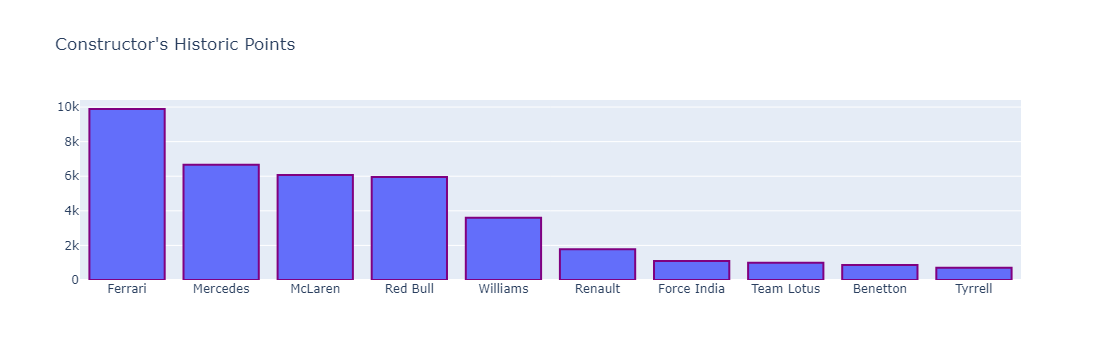

In [32]:
fig = go.Figure(
    data=[go.Bar(x = historic_points.name, y=historic_points['points'])],
    layout_title_text="Constructor's Historic Points"
)
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='purple', width=2)))
fig.show()


### Merging

In [11]:
df = circuits.merge(races,how='left',left_on = 'circuitid',right_on = 'circuitId')
df2 = df.merge(results,how='left',on='raceId')
status_df = df2.merge(status,how='inner',left_on = 'statusId',right_on= 'statusid')

In [12]:
status_df.drop(['name_y','url_y','url_x','time_y'],axis=1,inplace=True)
status_df.rename(columns={'name_x':'name','time_x':'time'},inplace=True)

## Air and Altitudes

In [13]:
altitude = status_df[status_df['status'].isin(['Transmission','Engine','Overheating'])]
altitude = altitude[altitude['year'] >= pd.to_datetime('2015-01-01')]
altitude.head(5)

,circuitid,circuitref,name,location,country,lat,lng,alt,raceId,year,...,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,statusid,status
430,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,926,2015-01-01,...,0.0,32.0,NaN,30.0,13.0,01:34.3,202.458,5.0,5,Engine
452,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,948,2016-01-01,...,0.0,38.0,NaN,15.0,21.0,01:33.9,203.327,5.0,5,Engine
453,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,948,2016-01-01,...,0.0,21.0,NaN,21.0,5.0,01:30.7,210.480,5.0,5,Engine
495,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,989,2018-01-01,...,0.0,13.0,NaN,13.0,18.0,01:30.6,210.601,5.0,5,Engine
517,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,1010,2019-01-01,...,0.0,9.0,NaN,9.0,20.0,01:30.9,210.022,5.0,5,Engine


In [14]:
circuit_altitudes = altitude.groupby(['name','alt'])['status'].count().sort_values(ascending = False).reset_index().head(10)
circuit_altitudes.rename(columns={'status':'engine & transmission failures'},inplace=True)
circuit_altitudes

,name,alt,engine & transmission failures
0,Autódromo Hermanos Rodríguez,2227,7
1,Bahrain International Circuit,7,7
2,Red Bull Ring,678,6
3,Albert Park Grand Prix Circuit,10,5
4,Autodromo Nazionale di Monza,162,5
5,Circuit de Spa-Francorchamps,401,4
6,Marina Bay Street Circuit,18,4
7,Yas Marina Circuit,3,4
8,Circuit de Barcelona-Catalunya,109,3
9,Hockenheimring,103,3


C:\Users\Charaf\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



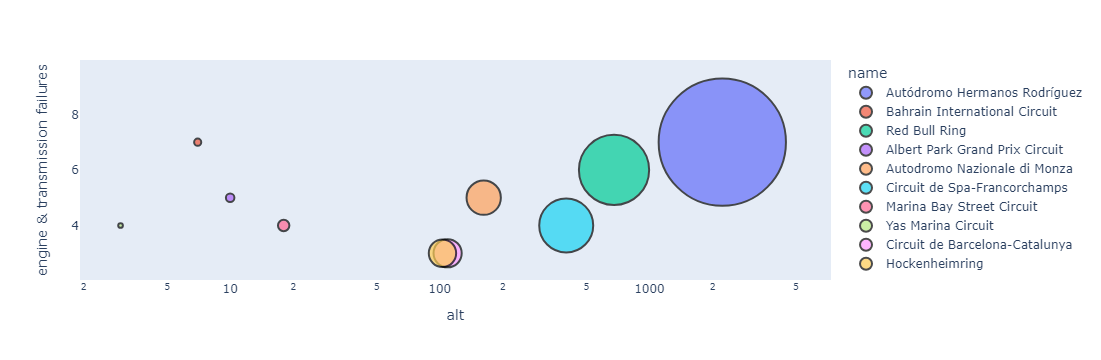

In [15]:
df = circuit_altitudes

fig = px.scatter(df, x="alt", y="engine & transmission failures",
         size="alt", color="name",
                  log_x=True, size_max= 90)
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Nationalities

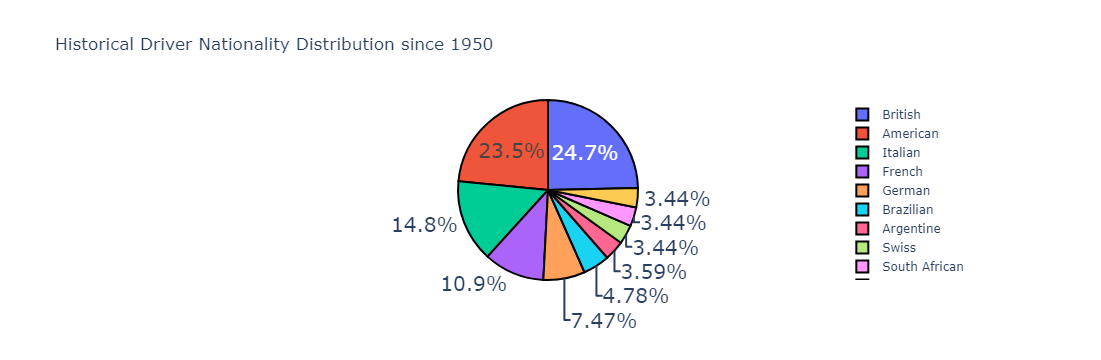

In [16]:
driver_nationality = drivers.groupby('nationality')['nationality'].count().sort_values(ascending = False).reset_index(name = 'number of drivers')
fig = go.Figure(data=[go.Pie(labels=driver_nationality.nationality.head(10), values=driver_nationality['number of drivers'])])
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(
    title="Historical Driver Nationality Distribution since 1950")
fig.show()

## Most wins by driver in a season

In [17]:
driver_position = drivers.merge(driver_standings,left_on='driverid',right_on='driverId',how = 'left')
driver_position = driver_position.merge(races,on = 'raceId',how = 'left')

In [18]:
positions = driver_position[driver_position['position'] == 1].groupby(
    ['surname','year'])['wins'].max().sort_values(ascending=False).reset_index(name = 'Wins')
positions.head(20)
positions.year = positions.year.dt.year
positions.rename(columns={'surname':'name'},inplace=True)
positions.Wins = positions.Wins.astype('int64')

positions.head(11)

,name,year,Wins
0,Schumacher,2004,13
1,Vettel,2013,13
2,Hamilton,2019,11
3,Vettel,2011,11
4,Schumacher,2002,11
5,Hamilton,2020,11
6,Hamilton,2018,11
7,Hamilton,2014,11
8,Hamilton,2015,10
9,Verstappen,2021,10


C:\Users\Charaf\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



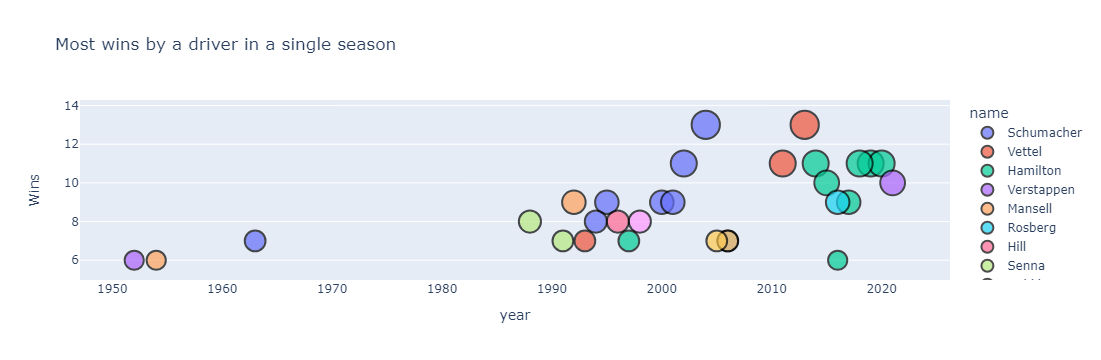

In [19]:
fig = px.scatter(positions.head(30), x="year", y="Wins", color="name",
                 title="Most wins by a driver in a single season",size = 'Wins')
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_xaxes(showgrid=False)
fig.show()

## Biggest Rivalary in the sport

### Closest season

In [20]:
competition = driver_position[driver_position['year'].dt.year == 1991
               ].groupby(['surname','year']).points.max().sort_values(ascending = False).reset_index().head(5)
competition.year = competition.year.dt.year
competition.iloc[0:2,0] 

0      Senna
1    Mansell
Name: surname, dtype: object

C:\Users\Charaf\AppData\Local\Temp\ipykernel_16372\698466456.py:15: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



BIGGEST RIVALARY IN THE MAKING!
----------------------------------


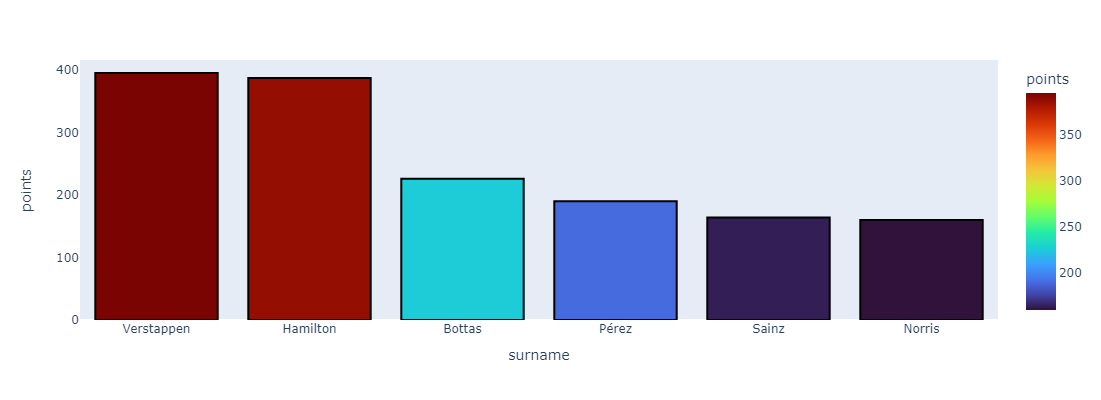

In [21]:
def rivalry(x):
    competition = driver_position[driver_position['year'].dt.year == x
               ].groupby(['surname','year']).points.max().sort_values(ascending = False).reset_index().head(5)
    competition.year = competition.year.dt.year    
    
    h = driver_position.merge(circuits,left_on='circuitId',right_on='circuitid',how = 'left')
    h.rename(columns={'name_y':'circuit_name'},inplace=True)
    viz = h.loc[:,['date','year','circuit_name','surname','points','wins']]

    viz.dropna(inplace = True)

    viz.points = viz.points.astype('int64')
    viz.wins = viz.wins.astype('int64')
    viz.year = viz.year.dt.year
    viz.date = pd.to_datetime(viz.date)
    
    top_five = viz[viz.loc[:,'year'] == x]
    top_five = top_five.groupby(['surname'])[['points','wins']].max().sort_values('points',ascending = False).head(6).reset_index()
    
    duo = competition.iloc[0:2]
    if competition.iloc[0,2] - competition.iloc[1,2] <= 10:
        print('\033[1m' + 'BIGGEST RIVALARY IN THE MAKING!')
    elif competition.iloc[0,2] - competition.iloc[1,2] <= 20:
        print('\033[1m' + 'Spicy!')
    elif competition.iloc[0,2] - competition.iloc[1,2] < 30:
        print('\033[1m' + 'Meh!')
    elif competition.iloc[0,2] - competition.iloc[1,2] >= 30:
        print('\033[1m' + 'Snore Fest!')

        
    df = top_five
    fig = px.bar(df, x='surname', y='points',
             hover_data=['wins'], color='points',
            height=400,color_continuous_scale= 'turbo')
    fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    
    print('----------------------------------')
    x = fig.show()
    return x 
rivalry(2021) 

### Merging

In [22]:
driver_quali = results.merge(drivers,left_on = 'driverId',right_on='driverid',how = 'left')
driver_quali['full_name'] = driver_quali['forename'] + ' ' + driver_quali['surname']
driver_quali = driver_quali[['full_name','grid','position']]


quali_wins = driver_quali[driver_quali['grid'] == 1].groupby('full_name')['grid'].sum().reset_index(
                                        name = 'grid poles').sort_values('grid poles',ascending = False)

In [23]:
quali_wins = quali_wins.reset_index(col_level=0)
quali_wins.drop('index',axis = 1,inplace = True)
quali_wins.head(20)

,full_name,grid poles
0,Lewis Hamilton,103
1,Michael Schumacher,68
2,Ayrton Senna,65
3,Sebastian Vettel,57
4,Jim Clark,34
5,Alain Prost,33
6,Nigel Mansell,32
7,Nico Rosberg,30
8,Juan Fangio,29
9,Mika Häkkinen,26


In [24]:
race_wins = drivers.merge(results,left_on='driverid',right_on='driverId',how = 'left')
race_wins['full_name'] = race_wins['forename'] + ' ' + race_wins['surname']

race_wins = race_wins[['full_name','position']]

In [25]:
highest_rw = race_wins[race_wins['position'] == 1.0].groupby('full_name').count().sort_values(
    'position', ascending = False).reset_index()
highest_rw.head(20)

,full_name,position
0,Lewis Hamilton,103
1,Michael Schumacher,91
2,Sebastian Vettel,53
3,Alain Prost,51
4,Ayrton Senna,41
5,Fernando Alonso,32
6,Nigel Mansell,31
7,Jackie Stewart,27
8,Max Verstappen,26
9,Niki Lauda,25


## Wins by Pole Position

In [26]:
racexpole = highest_rw.merge(quali_wins,on = 'full_name',how = 'left')
racexpole = racexpole[racexpole['grid poles'] > 10]                    
racexpole.dropna(inplace=True)     

In [27]:
racexpole.rename(columns={'position':'race poles'},inplace=True)
racexpole['grid poles'] = racexpole['grid poles'].astype(int)
racexpole['racexgrid'] = (racexpole['race poles']/racexpole['grid poles']).round(2)
racexpole = racexpole.sort_values('racexgrid',ascending=False).reset_index(col_level=0)
racexpole.drop('index',axis = 1,inplace = True)
racexpole.head(15)

,full_name,race poles,grid poles,racexgrid
0,Max Verstappen,26,16,1.62
1,Jackie Stewart,27,17,1.59
2,Alain Prost,51,33,1.55
3,Fernando Alonso,32,22,1.45
4,Michael Schumacher,91,68,1.34
5,Kimi Räikkönen,21,18,1.17
6,Damon Hill,22,20,1.10
7,David Coulthard,13,12,1.08
8,Jack Brabham,14,13,1.08
9,Graham Hill,14,13,1.08


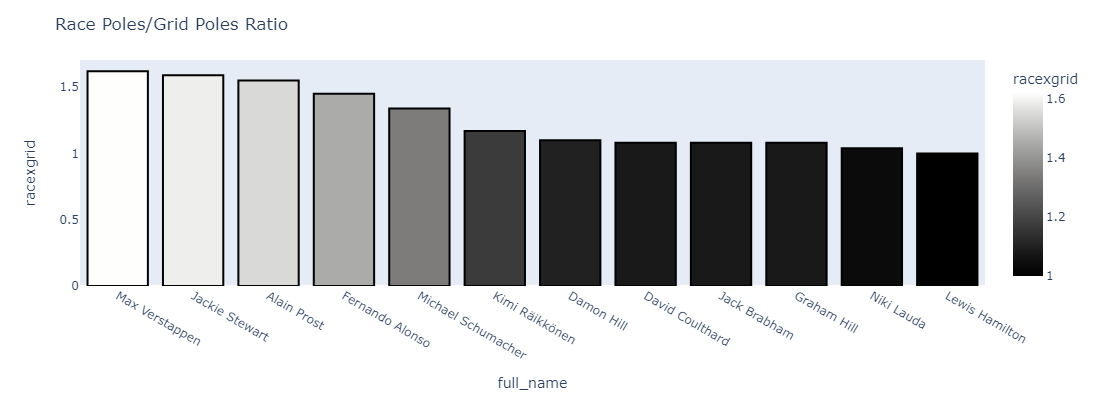

In [28]:
df = racexpole.head(12)
fig = px.bar(df, x='full_name', y='racexgrid',
         hover_data=['race poles','grid poles'], color='racexgrid',
        height=400,color_continuous_scale= 'gray')
fig.update_layout(
    title="Race Poles/Grid Poles Ratio")
fig.update_traces(textfont_size=20,
              marker=dict(line=dict(color='#000000', width=2)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

## Worst tracks based on overtaking action

In [29]:
tracks = circuits.merge(races, left_on='circuitid',right_on='circuitId',how = 'inner') 
tracks = tracks.merge(results,on = 'raceId',how = 'left')
tracks = tracks[['name_x','circuitid','driverId','position','grid','raceId','year']]
tracks.rename(columns={'name_x':'circuit'},inplace=True)
tracks.dropna(inplace = True)


tracks = tracks.loc[(tracks['year'] >= '2010-01-01')]
tracks

,circuit,circuitid,driverId,position,grid,raceId,year
302,Albert Park Grand Prix Circuit,1,18.0,1.0,4.0,338,2010-01-01
303,Albert Park Grand Prix Circuit,1,9.0,2.0,9.0,338,2010-01-01
304,Albert Park Grand Prix Circuit,1,13.0,3.0,5.0,338,2010-01-01
305,Albert Park Grand Prix Circuit,1,4.0,4.0,3.0,338,2010-01-01
306,Albert Park Grand Prix Circuit,1,3.0,5.0,6.0,338,2010-01-01
...,...,...,...,...,...,...,...
25623,Miami International Autodrome,79,817.0,13.0,14.0,1078,2022-01-01
25624,Miami International Autodrome,79,849.0,14.0,19.0,1078,2022-01-01
25625,Miami International Autodrome,79,854.0,15.0,15.0,1078,2022-01-01
25626,Miami International Autodrome,79,825.0,16.0,16.0,1078,2022-01-01
